In [424]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM
from numpy import array
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None  # default='warn'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [425]:
data = yf.download('AAPL','2008-01-01','2023-03-29')
new_data = yf.download('AAPL','2023-03-29')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [426]:
print(data.tail(5))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-22  159.300003  162.139999  157.809998  157.830002  157.830002   
2023-03-23  158.830002  161.550003  157.679993  158.929993  158.929993   
2023-03-24  158.860001  160.339996  157.850006  160.250000  160.250000   
2023-03-27  159.940002  160.770004  157.869995  158.279999  158.279999   
2023-03-28  157.970001  158.490005  155.979996  157.649994  157.649994   

              Volume  
Date                  
2023-03-22  75701800  
2023-03-23  67622100  
2023-03-24  59196500  
2023-03-27  52390300  
2023-03-28  45992200  


In [427]:
print(new_data.tail(5))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-29  159.369995  161.050003  159.350006  160.770004  160.770004   
2023-03-30  161.529999  162.470001  161.270004  162.360001  162.360001   
2023-03-31  162.440002  165.000000  161.910004  164.899994  164.899994   

              Volume  
Date                  
2023-03-29  51305700  
2023-03-30  49501700  
2023-03-31  68694700  


In [428]:
#Create an array from date 2023-03-15 to 30 days in future and remove sat and sun
future_dates = pd.date_range(start='2023-03-29', end='2023-04-29', freq='B')
print(future_dates)

DatetimeIndex(['2023-03-29', '2023-03-30', '2023-03-31', '2023-04-03',
               '2023-04-04', '2023-04-05', '2023-04-06', '2023-04-07',
               '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13',
               '2023-04-14', '2023-04-17', '2023-04-18', '2023-04-19',
               '2023-04-20', '2023-04-21', '2023-04-24', '2023-04-25',
               '2023-04-26', '2023-04-27', '2023-04-28'],
              dtype='datetime64[ns]', freq='B')


In [429]:
#Create an array from date 2023-03-15 to 30 days in future 
future_dates = pd.date_range(start='2023-03-29', end='2023-05-09', freq='B')
#print(future_dates)

#convert it to an array
future_dates = future_dates.to_numpy()
print(future_dates)

future_dates.shape

['2023-03-29T00:00:00.000000000' '2023-03-30T00:00:00.000000000'
 '2023-03-31T00:00:00.000000000' '2023-04-03T00:00:00.000000000'
 '2023-04-04T00:00:00.000000000' '2023-04-05T00:00:00.000000000'
 '2023-04-06T00:00:00.000000000' '2023-04-07T00:00:00.000000000'
 '2023-04-10T00:00:00.000000000' '2023-04-11T00:00:00.000000000'
 '2023-04-12T00:00:00.000000000' '2023-04-13T00:00:00.000000000'
 '2023-04-14T00:00:00.000000000' '2023-04-17T00:00:00.000000000'
 '2023-04-18T00:00:00.000000000' '2023-04-19T00:00:00.000000000'
 '2023-04-20T00:00:00.000000000' '2023-04-21T00:00:00.000000000'
 '2023-04-24T00:00:00.000000000' '2023-04-25T00:00:00.000000000'
 '2023-04-26T00:00:00.000000000' '2023-04-27T00:00:00.000000000'
 '2023-04-28T00:00:00.000000000' '2023-05-01T00:00:00.000000000'
 '2023-05-02T00:00:00.000000000' '2023-05-03T00:00:00.000000000'
 '2023-05-04T00:00:00.000000000' '2023-05-05T00:00:00.000000000'
 '2023-05-08T00:00:00.000000000' '2023-05-09T00:00:00.000000000']


(30,)

In [430]:
#Create empty array of size 10
actual_thirtydays_values = np.empty((30,1))

#Fill the empty array with NaN values
actual_thirtydays_values[:] = np.nan

for i in range(0,30):
  try:
    actual_thirtydays_values[i] = new_data['Close'][i]
  except:
    actual_thirtydays_values[i] = np.nan
    

#Add the date and the actual values to the dataframe
actual_thirtydays_values = pd.DataFrame(actual_thirtydays_values, columns=['Close'])
actual_thirtydays_values['Date'] = future_dates
actual_thirtydays_values = actual_thirtydays_values.set_index('Date')

print (actual_thirtydays_values)

                 Close
Date                  
2023-03-29  160.770004
2023-03-30  162.360001
2023-03-31  164.899994
2023-04-03         NaN
2023-04-04         NaN
2023-04-05         NaN
2023-04-06         NaN
2023-04-07         NaN
2023-04-10         NaN
2023-04-11         NaN
2023-04-12         NaN
2023-04-13         NaN
2023-04-14         NaN
2023-04-17         NaN
2023-04-18         NaN
2023-04-19         NaN
2023-04-20         NaN
2023-04-21         NaN
2023-04-24         NaN
2023-04-25         NaN
2023-04-26         NaN
2023-04-27         NaN
2023-04-28         NaN
2023-05-01         NaN
2023-05-02         NaN
2023-05-03         NaN
2023-05-04         NaN
2023-05-05         NaN
2023-05-08         NaN
2023-05-09         NaN


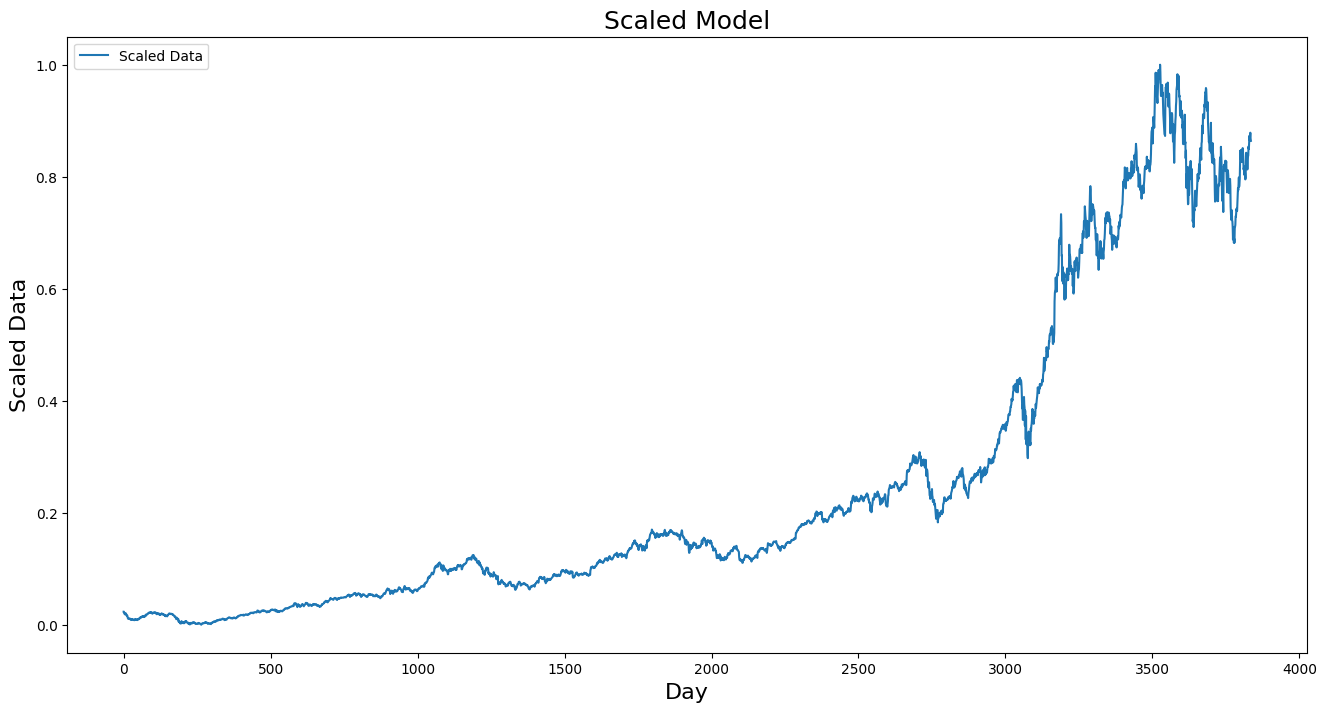

In [431]:
#Scale the data and plot the scaled data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

#plot the scaled data from day 0 to current day
plt.figure(figsize=(16,8))
plt.title('Scaled Model', fontsize=18)
plt.plot(scaled_data, label='Scaled Data')
plt.legend(loc='upper left')
plt.xlabel('Day', fontsize=16)
plt.ylabel('Scaled Data', fontsize=16)
plt.show()

In [432]:
scaled_data.shape

(3836, 1)

In [433]:
print(scaled_data)

[[0.02324395]
 [0.02326189]
 [0.02029661]
 ...
 [0.87858307]
 [0.86759081]
 [0.8640755 ]]


In [434]:
#Create a new dataframe with only the 'Close' column
data = data.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on (80% of the data)
training_size = int(np.ceil( len(scaled_data) * .8 ))
test_size = int(np.ceil( len(scaled_data) * .2 ))

#2860 is 80 percent of the total number of rows in the dataset
print("Total Rows in Training Dataset: ", training_size)
print("Total Rows in Testing Dataset: ", test_size)

Total Rows in Training Dataset:  3069
Total Rows in Testing Dataset:  768


In [435]:
#Split the data in to training and testing data, 80% training and 20% testing starting from the beginning of the dataset
train_data = scaled_data[0:training_size , :]
test_data = scaled_data[training_size:len(scaled_data), :]

#remove null values
train_data = train_data[~np.isnan(train_data).any(axis=1)]
test_data = test_data[~np.isnan(test_data).any(axis=1)]

#print the shape of the training and testing data
print("Training Data Shape: ", train_data.shape)
print("Testing Data Shape: ", test_data.shape)

Training Data Shape:  (3069, 1)
Testing Data Shape:  (767, 1)


In [436]:
#Time step is the number of days we want to look back to predict the next closing price
#We need use the training data to create the x_train and y_train data sets where x_train is the closing price of the previous 14 years and y_train is the closing price of the next day
#if data is 120, 130, 125, 140, 134, and 150 then x_train would be 120, 130, 125, 140, 134 and y_train would be 150
#We will do the same for the test data and then check the accuracy of the model

#Function to create the x_train and y_train data sets
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    #Loop through the data and create the x_train and y_train data sets
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] #Start from 0 to time_step and add to a
        dataX.append(a) #Store the values from 0 to time_step in dataX
        dataY.append(dataset[i+time_step, 0]) #Store the value of the next day in dataY
    return np.array(dataX), np.array(dataY) #Return the training data and the testing data as numpy arrays

In [437]:
#time step is the number of days we want to look back to predict the next closing price and we will use 30 days for this model
time_step = 30

#Create the training data set
x_train, y_train = create_dataset(train_data, time_step)

#30 features and 3038 rows
print (x_train.shape)
print (y_train.shape)

(3038, 30)
(3038,)


In [438]:
time_step = 30

#Create the testing data set
x_test, y_test = create_dataset(test_data, time_step)

#180 features an 730 rows
print(x_test.shape)
print(y_test.shape)

(736, 30)
(736,)


In [439]:
#Reshape the data to fit the LSTM model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [440]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model with the adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [441]:
#Fit the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3038/3038 [==============================] - 94s 27ms/step - loss: 1.8973e-04


In [442]:
#Predict the values using the testing data
train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict)

95/95 [==============================] - 5s 40ms/step


In [443]:
#Predict the values using the testing data
test_predict = model.predict(x_test)
test_predict = scaler.inverse_transform(test_predict)

23/23 [==============================] - 1s 21ms/step


In [444]:
#verify the shape of the training prediction data and the actual data
print(train_predict.shape)
print(data[30:3068].shape)

(3038, 1)
(3038, 1)


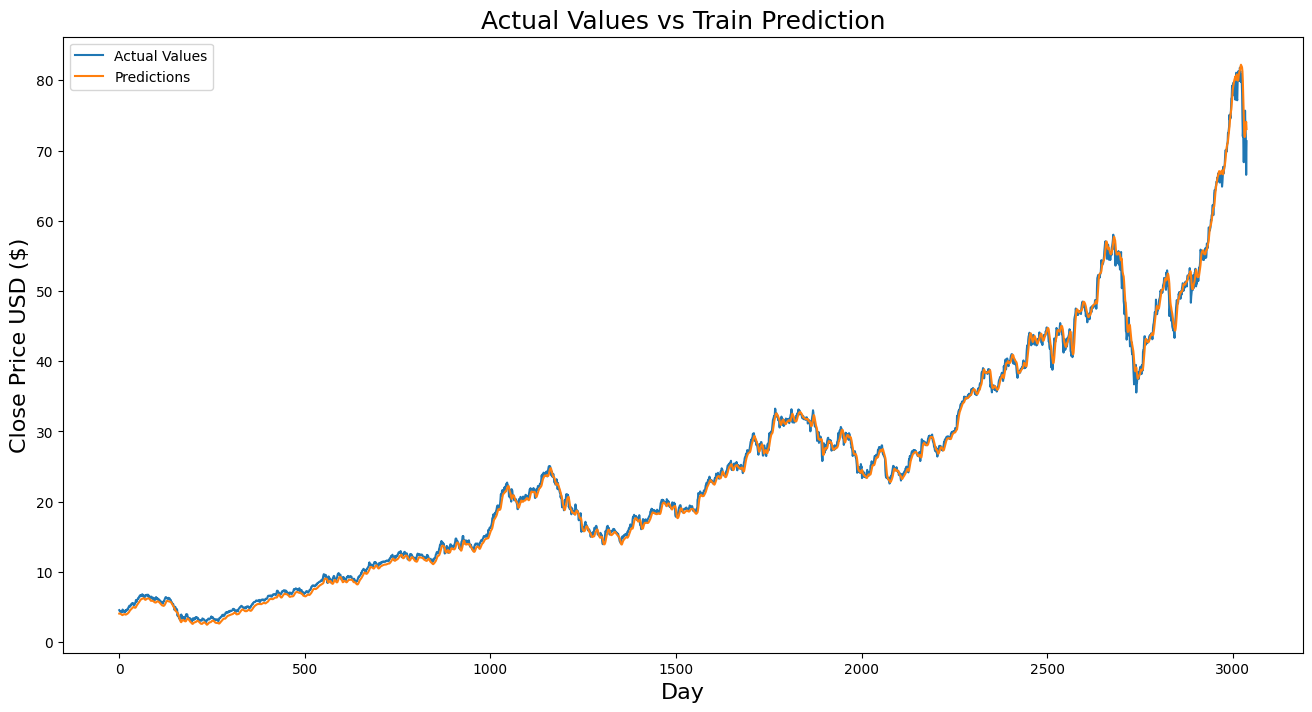

In [445]:
#Plot the train data and prediction
#Training Data Shape:  (3061, 1)

plt.figure(figsize=(16,8))
plt.title('Actual Values vs Train Prediction', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.plot(scaler.inverse_transform(scaled_data[30:3068]))
plt.plot(train_predict, color='red')
plt.legend(['Actual Values', 'Predictions'], loc='upper left')
plt.show()


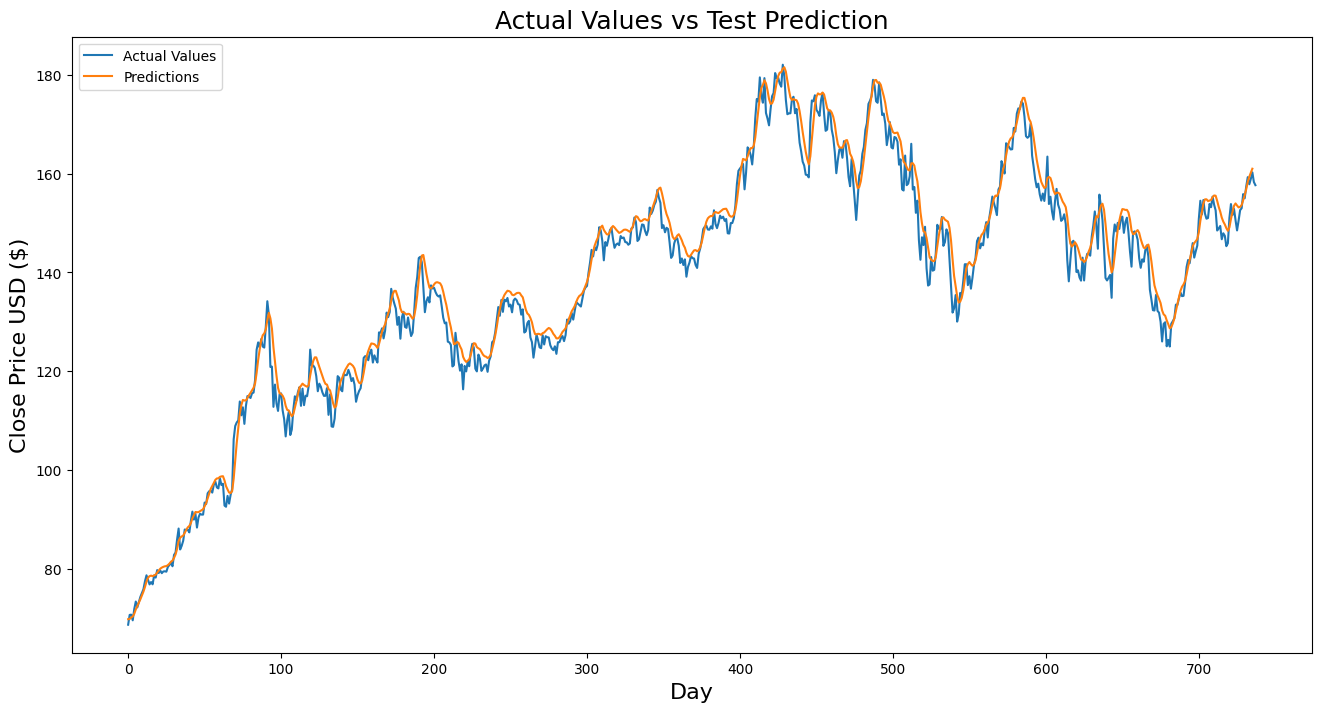

In [446]:
#Plot the test data and prediction
plt.figure(figsize=(16,8))
plt.title('Actual Values vs Test Prediction', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
#Plot only the test data
plt.plot(scaler.inverse_transform(scaled_data[3098:]))
plt.plot(test_predict)
plt.legend(['Actual Values', 'Predictions'], loc='upper left')
plt.show()

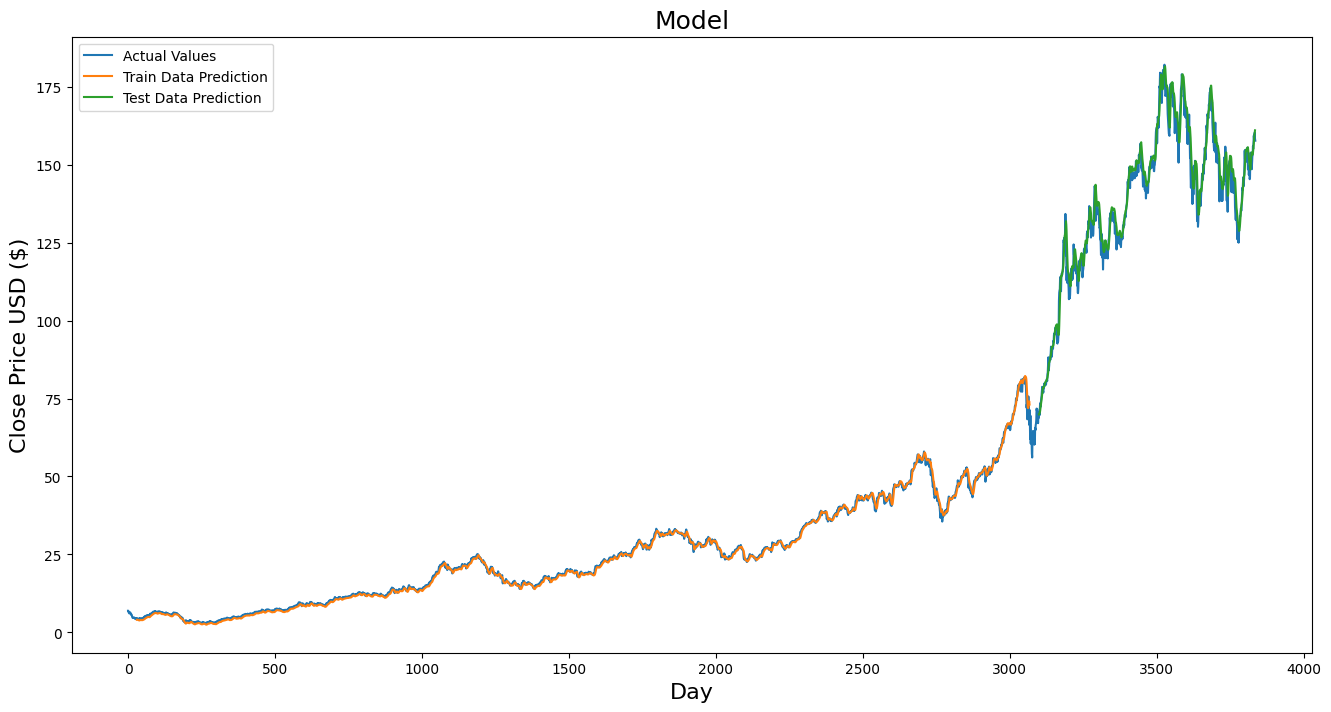

In [447]:
#Plot the data
look_back = 30
trainPredictPlot = np.empty_like(scaled_data)

trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#Plot the testing data and the model predictions
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict

#Plot the data
plt.figure(figsize=(16,8))
plt.title('Model', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
#plt.plot(y_test)
plt.plot(testPredictPlot)
plt.legend(['Actual Values', 'Train Data Prediction', 'Test Data Prediction'], loc='upper left')
plt.show()

In [448]:
#Get performance metrics for the model on the training and testing data using root mean squared error (RMSE)
trainScore = math.sqrt(mean_squared_error(y_train, train_predict))
testScore = math.sqrt(mean_squared_error(y_test, test_predict))

print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 29.63 RMSE
Test Score: 140.66 RMSE


In [449]:
len(test_data)

767

In [450]:
#Training Data Shape:  (3061, 1)
#Testing Data Shape:  (765, 1)
#Get the last 30 days of the training data and convert it to an array (765 - 30 = 735)

x_input = test_data[737:].reshape(1,-1) #Predict the closing price for the next 30 days starting from 685
x_input.shape

(1, 30)

In [451]:
#Convert the data to a list
temp_input = list(x_input)
temp_input = temp_input[0].tolist() #Convert the data to a list

print(len(temp_input)) #The length of the list should be 30 as we are predicting the closing price for the next 30 days

30


In [452]:
#Predict the closing price for the next 30 days

lst_output = []
n_steps = 30
i = 0 #Day 1
while(i<30):
      #if the length of the list is greater than 30, then we will shift by 1 day and take new output as the input for the next day prediction
      if(len(temp_input)>30): #
          #print(temp_input)
          x_input = np.array(temp_input[1:])
          print("{} day input {}".format(i,x_input))
          x_input = x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
          print("{} day output {}".format(i,yhat))
          temp_input.extend(yhat[0].tolist())
          temp_input = temp_input[1:]
          #print(temp_input)
          lst_output.extend(yhat.tolist())
          i=i+1
      #If the length of the list is less than 30, then we will add the last 30 days to the list and predict the next 30 days
      else:
          x_input = x_input.reshape((1, n_steps,1)) #Reshape the data to fit the model
          yhat = model.predict(x_input, verbose=0)  #Predict the closing price for the next 30 days
          print(yhat[0]) #Print the predicted closing price
          temp_input.extend(yhat[0].tolist()) #Add the predicted closing price to the list
          print(len(temp_input)) #The length of the list should be 30
          lst_output.extend(yhat.tolist()) #Add the predicted closing price to previous list (temp_input)
          i=i+1 

[0.88273346]
31
1 day input [0.85113035 0.84209106 0.83561845 0.81290852 0.81530789 0.81804195
 0.8030323  0.80978384 0.80693816 0.79522049 0.79856842 0.82713709
 0.84276061 0.83031763 0.83740395 0.82468196 0.81302014 0.8240124
 0.8358416  0.83807358 0.85403188 0.849289   0.86268054 0.87317064
 0.86507991 0.87121766 0.87858307 0.86759081 0.8640755  0.88273346]
1 day output [[0.88432777]]
2 day input [0.84209106 0.83561845 0.81290852 0.81530789 0.81804195 0.8030323
 0.80978384 0.80693816 0.79522049 0.79856842 0.82713709 0.84276061
 0.83031763 0.83740395 0.82468196 0.81302014 0.8240124  0.8358416
 0.83807358 0.85403188 0.849289   0.86268054 0.87317064 0.86507991
 0.87121766 0.87858307 0.86759081 0.8640755  0.88273346 0.88432777]
2 day output [[0.8870771]]
3 day input [0.83561845 0.81290852 0.81530789 0.81804195 0.8030323  0.80978384
 0.80693816 0.79522049 0.79856842 0.82713709 0.84276061 0.83031763
 0.83740395 0.82468196 0.81302014 0.8240124  0.8358416  0.83807358
 0.85403188 0.849289   

In [453]:
day_new = np.arange(1,31) #Create a new array with the previous 30 days
day_pred = np.arange(31,61) #Create a new array with the next 30 days

In [454]:
#Print the predicted closing price for the next 30 days
print(scaler.inverse_transform(lst_output))

[[160.99382163]
 [161.27954842]
 [161.77227437]
 [162.37806045]
 [163.04545062]
 [163.74577394]
 [164.46230211]
 [165.18535709]
 [165.90955507]
 [166.63141364]
 [167.34917027]
 [168.06178877]
 [168.76863889]
 [169.46916517]
 [170.16333555]
 [170.851353  ]
 [171.53313206]
 [172.2088757 ]
 [172.8785839 ]
 [173.54221395]
 [174.19970175]
 [174.85112208]
 [175.49633606]
 [176.13549325]
 [176.76836932]
 [177.39497495]
 [178.01541697]
 [178.62953514]
 [179.23724401]
 [179.83871449]]


In [455]:
#add the predicted closing price to the actual closing price
actual_thirtydays_values['Predictions'] = scaler.inverse_transform(lst_output)

print(actual_thirtydays_values)

                 Close  Predictions
Date                               
2023-03-29  160.770004   160.993822
2023-03-30  162.360001   161.279548
2023-03-31  164.899994   161.772274
2023-04-03         NaN   162.378060
2023-04-04         NaN   163.045451
2023-04-05         NaN   163.745774
2023-04-06         NaN   164.462302
2023-04-07         NaN   165.185357
2023-04-10         NaN   165.909555
2023-04-11         NaN   166.631414
2023-04-12         NaN   167.349170
2023-04-13         NaN   168.061789
2023-04-14         NaN   168.768639
2023-04-17         NaN   169.469165
2023-04-18         NaN   170.163336
2023-04-19         NaN   170.851353
2023-04-20         NaN   171.533132
2023-04-21         NaN   172.208876
2023-04-24         NaN   172.878584
2023-04-25         NaN   173.542214
2023-04-26         NaN   174.199702
2023-04-27         NaN   174.851122
2023-04-28         NaN   175.496336
2023-05-01         NaN   176.135493
2023-05-02         NaN   176.768369
2023-05-03         NaN   177

In [456]:
#Calculate the accuracy from the actual closing price and the predicted closing price for the next 30 days

#calculate accuray by subtracting the actual closing price and the predicted closing price and divide by the actual closing price and multiply by 100 to get the percentage
accuracy = (actual_thirtydays_values['Close'] - actual_thirtydays_values['Predictions']) / actual_thirtydays_values['Close'] * 100

#add the accuracy to the actual closing price and the predicted closing price
actual_thirtydays_values['Accuracy'] = (accuracy)

print (actual_thirtydays_values)

                 Close  Predictions  Accuracy
Date                                         
2023-03-29  160.770004   160.993822 -0.139216
2023-03-30  162.360001   161.279548  0.665467
2023-03-31  164.899994   161.772274  1.896737
2023-04-03         NaN   162.378060       NaN
2023-04-04         NaN   163.045451       NaN
2023-04-05         NaN   163.745774       NaN
2023-04-06         NaN   164.462302       NaN
2023-04-07         NaN   165.185357       NaN
2023-04-10         NaN   165.909555       NaN
2023-04-11         NaN   166.631414       NaN
2023-04-12         NaN   167.349170       NaN
2023-04-13         NaN   168.061789       NaN
2023-04-14         NaN   168.768639       NaN
2023-04-17         NaN   169.469165       NaN
2023-04-18         NaN   170.163336       NaN
2023-04-19         NaN   170.851353       NaN
2023-04-20         NaN   171.533132       NaN
2023-04-21         NaN   172.208876       NaN
2023-04-24         NaN   172.878584       NaN
2023-04-25         NaN   173.54221

In [457]:
closingPrice = actual_thirtydays_values['Close']
print(closingPrice)

Date
2023-03-29    160.770004
2023-03-30    162.360001
2023-03-31    164.899994
2023-04-03           NaN
2023-04-04           NaN
2023-04-05           NaN
2023-04-06           NaN
2023-04-07           NaN
2023-04-10           NaN
2023-04-11           NaN
2023-04-12           NaN
2023-04-13           NaN
2023-04-14           NaN
2023-04-17           NaN
2023-04-18           NaN
2023-04-19           NaN
2023-04-20           NaN
2023-04-21           NaN
2023-04-24           NaN
2023-04-25           NaN
2023-04-26           NaN
2023-04-27           NaN
2023-04-28           NaN
2023-05-01           NaN
2023-05-02           NaN
2023-05-03           NaN
2023-05-04           NaN
2023-05-05           NaN
2023-05-08           NaN
2023-05-09           NaN
Name: Close, dtype: float64


In [472]:
lastDayClosingPrice = closingPrice.iloc[0]
print(lastDayClosingPrice)

160.77000427246094


In [ ]:
#Add a new column to actual_thirtydays_values called 'Profit Percentage' and set all values to 0
actual_thirtydays_values['Profit Percentage'] = 0

In [474]:
firstPredicted = actual_thirtydays_values['Predictions'].iloc[0]
print(firstPredicted)

160.99382163475903


In [475]:
difference = lastDayClosingPrice - firstPredicted
print(difference)

-0.22381736229809235


In [477]:
#Add new column Buy/Sell/Hold to the dataframe with nil values
actual_thirtydays_values['Buy/Sell/Hold'] = np.nan

In [478]:
print(data.tail(5))

                 Close
Date                  
2023-03-22  157.830002
2023-03-23  158.929993
2023-03-24  160.250000
2023-03-27  158.279999
2023-03-28  157.649994


In [480]:
lastDay = data['Close'].iloc[-1]
print(lastDay)

157.64999389648438


In [588]:
firstPredicted = actual_thirtydays_values['Predictions'].iloc[0]
print(firstPredicted)

160.99382163475903


In [600]:
difference = firstPredicted - lastDay
print(difference)

3.343827738274655


In [599]:
print(actual_thirtydays_values.head(10))

                 Close  Predictions  Accuracy Buy/Sell/Hold     Profit
Date                                                                  
2023-03-29  160.770004   160.993822 -0.139216          Sell   9.984903
2023-03-30  162.360001   161.279548  0.665467          Sell  10.477629
2023-03-31  164.899994   161.772274  1.896737          Sell  11.083415
2023-04-03         NaN   162.378060       NaN          Sell  11.750805
2023-04-04         NaN   163.045451       NaN          Sell  12.451129
2023-04-05         NaN   163.745774       NaN          Sell  13.167657
2023-04-06         NaN   164.462302       NaN          Sell  13.890712
2023-04-07         NaN   165.185357       NaN          Sell  14.614910
2023-04-10         NaN   165.909555       NaN          Sell  15.336768
2023-04-11         NaN   166.631414       NaN          Sell  16.054525


In [601]:
total_difference  = difference
print(total_difference)


3.343827738274655


In [602]:
#ADD PROFIT COLUMN TO THE DATAFRAME
actual_thirtydays_values['Profit'] = np.nan
print(actual_thirtydays_values.head(10))

                 Close  Predictions  Accuracy Buy/Sell/Hold  Profit
Date                                                               
2023-03-29  160.770004   160.993822 -0.139216          Sell     NaN
2023-03-30  162.360001   161.279548  0.665467          Sell     NaN
2023-03-31  164.899994   161.772274  1.896737          Sell     NaN
2023-04-03         NaN   162.378060       NaN          Sell     NaN
2023-04-04         NaN   163.045451       NaN          Sell     NaN
2023-04-05         NaN   163.745774       NaN          Sell     NaN
2023-04-06         NaN   164.462302       NaN          Sell     NaN
2023-04-07         NaN   165.185357       NaN          Sell     NaN
2023-04-10         NaN   165.909555       NaN          Sell     NaN
2023-04-11         NaN   166.631414       NaN          Sell     NaN


In [603]:
i=0
for i in range(0,10):
  total_difference  = total_difference + (actual_thirtydays_values['Predictions'][i+1] - actual_thirtydays_values['Predictions'][i])
  print(total_difference)
  actual_thirtydays_values['Profit'][i] = total_difference

  #Sell if the profit is less than 4% or the loss is greater than 2%
  if total_difference > 4 or total_difference < -2:
      #Calculate loss percentage 
      actual_thirtydays_values['Buy/Sell/Hold'][i] = 'Sell'
  #hold if the profit is between -4% and 4%
  elif total_difference >= -2 and total_difference <= 4:
      actual_thirtydays_values['Buy/Sell/Hold'][i] = 'Hold'
        #Buy if the profit is greater than -4%
  elif total_difference < -5:
      actual_thirtydays_values['Buy/Sell/Hold'][i] = 'Buy'

3.6295545236876876
4.122280473439503
4.728066550932141
5.39545672486102
6.095780040685696
6.812308214199618
7.535363195919274
8.259561170237959
8.981419748489458
9.69917637199299


In [ ]:
#create an array with 30 index with 0 values
profit = np.zeros(30)


In [604]:
print (actual_thirtydays_values.head(10))

                 Close  Predictions  Accuracy Buy/Sell/Hold    Profit
Date                                                                 
2023-03-29  160.770004   160.993822 -0.139216          Hold  3.629555
2023-03-30  162.360001   161.279548  0.665467          Sell  4.122280
2023-03-31  164.899994   161.772274  1.896737          Sell  4.728067
2023-04-03         NaN   162.378060       NaN          Sell  5.395457
2023-04-04         NaN   163.045451       NaN          Sell  6.095780
2023-04-05         NaN   163.745774       NaN          Sell  6.812308
2023-04-06         NaN   164.462302       NaN          Sell  7.535363
2023-04-07         NaN   165.185357       NaN          Sell  8.259561
2023-04-10         NaN   165.909555       NaN          Sell  8.981420
2023-04-11         NaN   166.631414       NaN          Sell  9.699176
